## research for rq3

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Weekdays Aggregation (by hour):
    hour  taxi_demand  avg_journey_time_sec  avg_journey_time_min
0      0        39300            981.884987             16.364750
1      1        23758            932.196692             15.536612
2      2        15894            910.930414             15.182174
3      3        12508            946.379437             15.772991
4      4        15449           1052.557900             17.542632
5      5        23332           1089.650651             18.160844
6      6        39622           1173.298672             19.554978
7      7        60972           1213.101424             20.218357
8      8        75056           1196.872975             19.947883
9      9        67804           1177.281458             19.621358
10    10        58376           1206.622413             20.110374
11    11        55718           1243.527316             20.725455
12    12        56215           1242.910166             20.715169
13    13        58416           1283.955269 

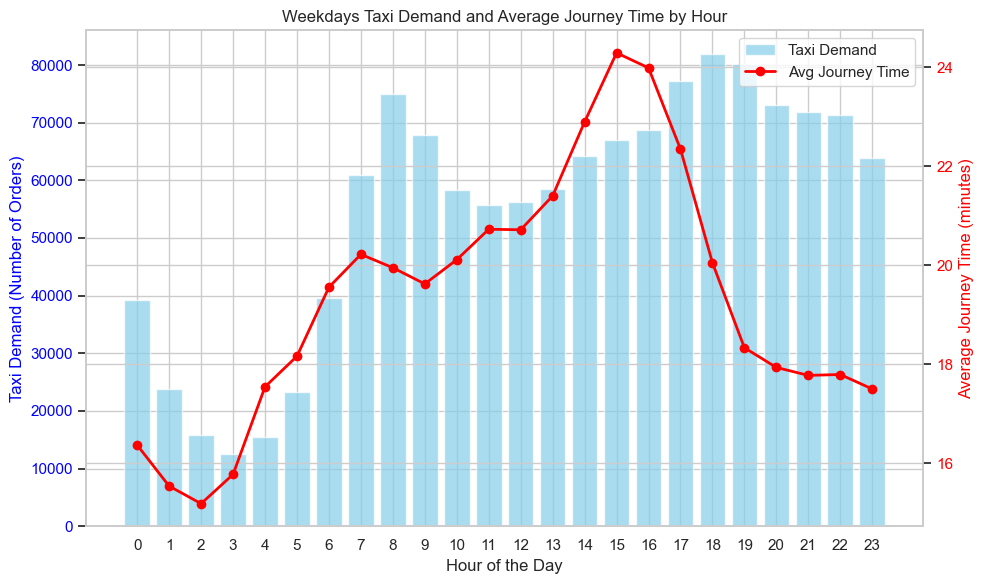

Weekends Aggregation (by hour):
    hour  taxi_demand  avg_journey_time_sec  avg_journey_time_min
0      0        34556           1022.632278             17.043871
1      1        28444            965.590564             16.093176
2      2        22057            953.376343             15.889606
3      3        17031            955.801362             15.930023
4      4        13012            995.818706             16.596978
5      5         9857           1027.420006             17.123667
6      6        10952           1038.155588             17.302593
7      7        13173           1013.838382             16.897306
8      8        15815           1013.557951             16.892633
9      9        19922           1010.400813             16.840014
10    10        23614           1044.065131             17.401086
11    11        25796           1107.368119             18.456135
12    12        26979           1157.858149             19.297636
13    13        28191           1200.105530 

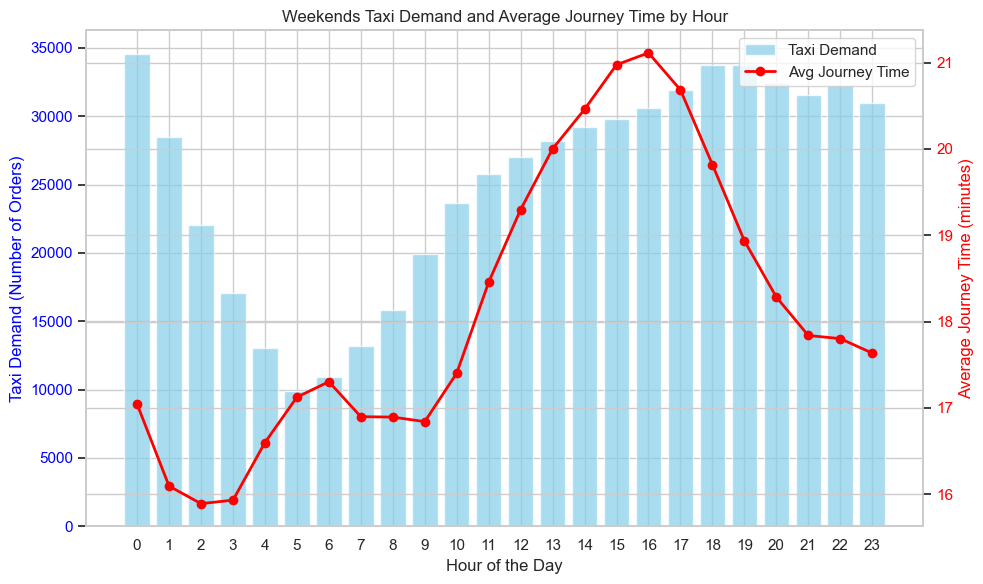

In [ ]:

# 设置绘图风格
sns.set(style="whitegrid")

# ------------------------------
# 1. Read the processed data
# ------------------------------
file_name = "2022_processed_all.csv"
# Parse datetime columns as necessary
df = pd.read_csv(file_name, parse_dates=['pickup_datetime', 'dropoff_datetime'])

# ------------------------------
# 2. Data Cleaning and Feature Extraction
# ------------------------------
# Ensure trip_time is numeric (assumed to be in seconds)
df['trip_time'] = pd.to_numeric(df['trip_time'], errors='coerce')
# Filter out rows with non-positive trip_time
df = df[df['trip_time'] > 0]

# Create new columns: hour of day and weekday (Monday=0, Sunday=6)
df['hour'] = df['pickup_datetime'].dt.hour
df['weekday'] = df['pickup_datetime'].dt.weekday

# ------------------------------
# 3. Weekdays Analysis
# ------------------------------
# Filter data for weekdays (Monday=0 to Friday=4)
weekdays_df = df[df['weekday'] < 5]

# Group by hour: calculate taxi demand (order count) and average journey time
weekdays_group = weekdays_df.groupby('hour').agg(
    taxi_demand=('pickup_datetime', 'count'),
    avg_journey_time_sec=('trip_time', 'mean')
).reset_index()
# Convert average journey time to minutes
weekdays_group['avg_journey_time_min'] = weekdays_group['avg_journey_time_sec'] / 60.0

print("Weekdays Aggregation (by hour):")
print(weekdays_group)

# Plot Weekdays: Taxi Demand and Average Journey Time by Hour
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for taxi demand
ax1.bar(weekdays_group['hour'], weekdays_group['taxi_demand'], color='skyblue', alpha=0.7, label='Taxi Demand')
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Taxi Demand (Number of Orders)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(np.arange(0, 24, 1))
ax1.set_title('Weekdays Taxi Demand and Average Journey Time by Hour')

# Line plot for average journey time on the twin y-axis
ax2 = ax1.twinx()
ax2.plot(weekdays_group['hour'], weekdays_group['avg_journey_time_min'], color='red', marker='o', linewidth=2, label='Avg Journey Time')
ax2.set_ylabel('Average Journey Time (minutes)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.tight_layout()
plt.show()

# ------------------------------
# 4. Weekends Analysis
# ------------------------------
# Filter data for weekends (Saturday=5, Sunday=6)
weekends_df = df[df['weekday'] >= 5]

# Group by hour: calculate taxi demand and average journey time
weekends_group = weekends_df.groupby('hour').agg(
    taxi_demand=('pickup_datetime', 'count'),
    avg_journey_time_sec=('trip_time', 'mean')
).reset_index()
weekends_group['avg_journey_time_min'] = weekends_group['avg_journey_time_sec'] / 60.0

print("Weekends Aggregation (by hour):")
print(weekends_group)

# Plot Weekends: Taxi Demand and Average Journey Time by Hour
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(weekends_group['hour'], weekends_group['taxi_demand'], color='skyblue', alpha=0.7, label='Taxi Demand')
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Taxi Demand (Number of Orders)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(np.arange(0, 24, 1))
ax1.set_title('Weekends Taxi Demand and Average Journey Time by Hour')

ax2 = ax1.twinx()
ax2.plot(weekends_group['hour'], weekends_group['avg_journey_time_min'], color='red', marker='o', linewidth=2, label='Avg Journey Time')
ax2.set_ylabel('Average Journey Time (minutes)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.tight_layout()
plt.show()


Uber Data Preview:
  hvfhs_license_num dispatching_base_num originating_base_num  \
0            HV0003               B03404               B03404   
1            HV0003               B03404               B03404   
2            HV0005               B03406                  NaN   
3            HV0003               B03404               B03404   
4            HV0005               B03406                  NaN   

      request_datetime    on_scene_datetime     pickup_datetime  \
0  2022-01-23 17:11:03  2022-01-23 17:12:56 2022-01-23 17:14:56   
1  2022-01-07 23:13:02  2022-01-07 23:15:30 2022-01-07 23:17:30   
2  2022-01-18 08:19:22                  NaN 2022-01-18 08:28:15   
3  2022-01-28 01:09:54  2022-01-28 01:11:53 2022-01-28 01:13:53   
4  2022-01-31 23:25:31                  NaN 2022-01-31 23:29:24   

     dropoff_datetime  PULocationID  DOLocationID  trip_miles  trip_time  \
0 2022-01-23 17:25:49           248            20       3.340        653   
1 2022-01-07 23:53:36           261

C:\Users\New\AppData\Local\Temp\ipykernel_38348\1897831396.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=borough_group, x="Borough", y="order_count", palette="viridis")


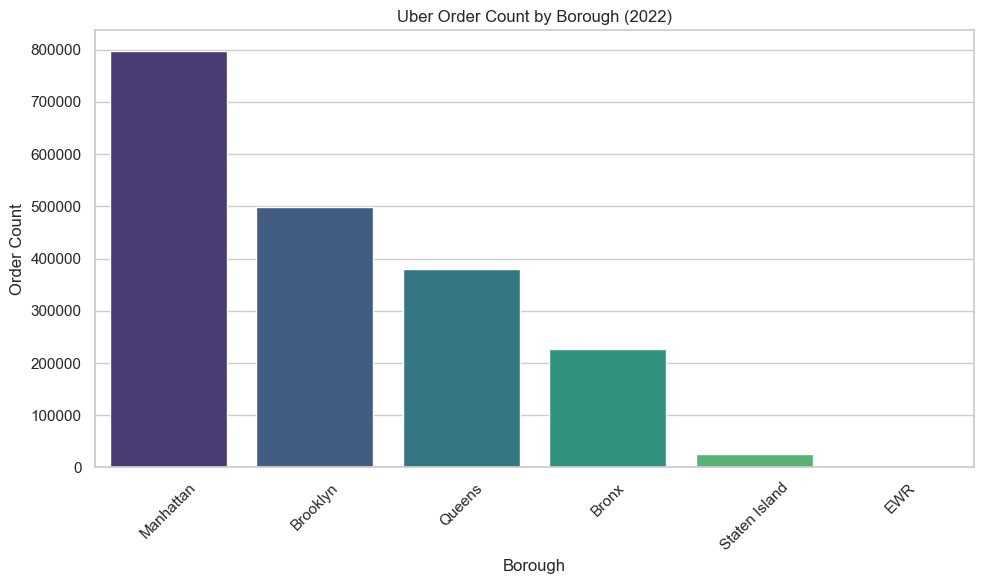

In [ ]:
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)

# ------------------------------
# 1. 读取数据
# ------------------------------
# 读取处理后的 Uber 数据（2022_processed_all.csv），并解析时间列
uber_df = pd.read_csv("2022_processed_all.csv", parse_dates=['pickup_datetime', 'dropoff_datetime'])
print("Uber Data Preview:")
print(uber_df.head())

# 读取 Taxi Zone Lookup 表
zone_lookup = pd.read_csv("taxi_zone_lookup.csv")
print("\nTaxi Zone Lookup Preview:")
print(zone_lookup.head())

# ------------------------------
# 2. 数据关联：将 Uber 数据与区域对照表合并
# ------------------------------
# 关联条件：Uber 数据中的 PULocationID 与 taxi_zone_lookup 中的 LocationID 对应
# 注意：保证两边的数据类型一致，如果必要可进行转换
uber_df['PULocationID'] = pd.to_numeric(uber_df['PULocationID'], errors='coerce')
zone_lookup['LocationID'] = pd.to_numeric(zone_lookup['LocationID'], errors='coerce')

# 以 left join 关联，保留 Uber 所有记录，加入 Borough、Zone 及 service_zone 信息
uber_df = uber_df.merge(zone_lookup, left_on='PULocationID', right_on='LocationID', how='left')

# 查看合并后部分数据，确保 Borough、Zone 等已正确添加
print("\nUber Data with Region Information Preview:")
print(uber_df[['pickup_datetime', 'PULocationID', 'Borough', 'Zone']].head(10))

# ------------------------------
# 3. 按 Region 进行分组统计
# ------------------------------

borough_group = uber_df.groupby("Borough").size().reset_index(name="order_count")
# 按照 Borough 字母顺序排序，而不是按照订单数
borough_group = borough_group.sort_values(by="Borough", ascending=True)
print(borough_group)

# # 方式 2：按 Borough 和 Zone 分组统计（细分区域）
# region_zone_group = uber_df.groupby(["Borough", "Zone"]).size().reset_index(name="order_count")
# region_zone_group = region_zone_group.sort_values(by="order_count", ascending=False)
# print("\nOrders grouped by Borough and Zone:")
# print(region_zone_group)

# ------------------------------
# 4. 绘图展示各区域订单数（Borough）
# ------------------------------
plt.figure(figsize=(10,6))
sns.barplot(data=borough_group, x="Borough", y="order_count", palette="viridis")
plt.title("Uber Order Count by Borough (2022)")
plt.xlabel("Borough")
plt.ylabel("Order Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# # 如果想细分展示每个 Borough 内不同 Zone 的情况，可以绘制分面图或堆叠条形图
# # 此处给出简单的堆积条形图示例
# # Pivot 表：行索引 Borough，列为 Zone，值为 order_count
# pivot_table = region_zone_group.pivot(index="Borough", columns="Zone", values="order_count").fillna(0)
# pivot_table = pivot_table.sort_index()

# # 绘制堆积条形图
# pivot_table.plot(kind="bar", stacked=True, figsize=(12,8))
# plt.title("Uber Order Count by Borough and Zone (2022)")
# plt.xlabel("Borough")
# plt.ylabel("Order Count")
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()
